<a href="https://colab.research.google.com/github/KevinHern/SP1-Educational-Material/blob/main/demos/SP1_Example_ML_Pipeline_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparations

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf


# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Miscellaneous Libraries
import os

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# 1) Dataset Preparations

## Tarea:
Clasificar los distintos vinos → Tarea es de clasficación = CLASSIFICATION TASK

In [ ]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality
'''
raw_dataset = pd.read_csv("winequality-white-modified.csv", sep=";")
raw_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Seven,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,Six,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,Eight,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,Seven,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,Seven,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,Six,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,Six,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,Six,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,Five,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Check all columns' datatypes
raw_dataset.dtypes

fixed acidity            object
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# checking shape
raw_dataset.shape

(4898, 12)

## Problemas:
- Escalas de variables
- Strings en el dataset → fixed acidity

# 2) Pre-processing

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Seven,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,Six,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Eight,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Seven,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Seven,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Encoding de variables
Mapping value → fixed acidity

In [ ]:
# Visualizar valores unicos
print(len(new_dataset["fixed acidity"].unique()), new_dataset["fixed acidity"].unique())

10 ['Seven' 'Six' 'Eight' 'Five' 'Nine' 'Ten' 'Four' 'Fourteen' 'Eleven'
 'Three']


In [ ]:
# With this information, we can perform mapping. We have to a define a function that maps all values
def map_acidity(x):
  if x == 'Cero':
    return 0
  elif x == 'One':
    return 1
  elif x == 'Two':
    return 2
  elif x == 'Three':
    return 3
  elif x == 'Four':
    return 4
  elif x == 'Five':
    return 5
  elif x == 'Six':
    return 6
  elif x == 'Seven':
    return 7
  elif x == 'Eight':
    return 8
  elif x == 'Nine':
    return 9
  elif x == 'Ten':
    return 10
  elif x == 'Eleven':
    return 11
  elif x == 'Twelve':
    return 12
  elif x == 'Thirteen':
    return 13
  elif x == 'Fourteen':
    return 14
  elif x == 'Fifteen':
    return 15
  elif x == 'Seventeen':
    return 17
  else:  # In case we missed a value, we return None
    return None

In [ ]:
# Encoding fixed acidity with Mapping Values Technique
new_dataset["fixed acidity"] = new_dataset["fixed acidity"].apply(map_acidity)

In [ ]:
print(len(new_dataset["fixed acidity"].unique()), new_dataset["fixed acidity"].unique())

10 [ 7  6  8  5  9 10  4 14 11  3]


## Normalize Values

In [ ]:
# Definamos la función de normalizaciond
def normalize_min_max(column):
  # Extract column's max value 
  max_value = np.max(column)
  # Extract column's min value 
  min_value = np.min(column)
  return (column - min_value)/(max_value - min_value)

In [ ]:
# Extract all columns but the last one
columns_to_normalize = new_dataset.columns
columns_to_normalize = columns_to_normalize[0:-1]

# Normalize columns
for column in columns_to_normalize:
  new_dataset[column] = normalize_min_max(new_dataset[column]);

new_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.309737,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,5.877909
std,0.080902,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.885639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.272727,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,5.000000
50%,0.272727,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,6.000000
75%,0.363636,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [ ]:
# Data copy
normalized_dataset = new_dataset.copy()

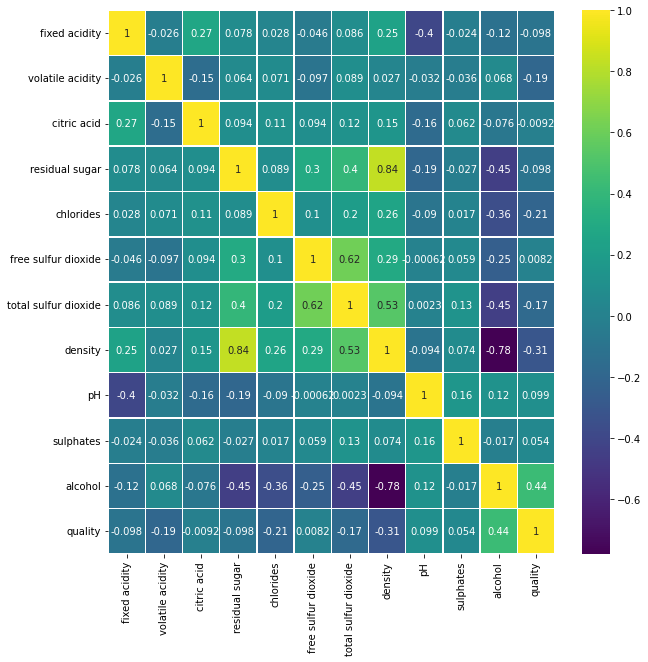

In [ ]:
# Matriz de correlation
correlation_matrix = normalized_dataset.corr()

# Plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, linewidths=.5, cmap='viridis', annot=True)

## Seleccionar columnas importantes

In [ ]:
normalized_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Quitar columnas manualmente
normalized_dataset.pop('fixed acidity')
normalized_dataset.pop('citric acid')
normalized_dataset.pop('residual sugar')
normalized_dataset.pop('free sulfur dioxide')
normalized_dataset.pop('sulphates')
normalized_dataset

,volatile acidity,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,0.186275,0.106825,0.373550,0.267785,0.254545,0.129032,6
1,0.215686,0.118694,0.285383,0.132832,0.527273,0.241935,6
2,0.196078,0.121662,0.204176,0.154039,0.490909,0.338710,6
3,0.147059,0.145401,0.410673,0.163678,0.427273,0.306452,6
4,0.147059,0.145401,0.410673,0.163678,0.427273,0.306452,6
...,...,...,...,...,...,...,...
4893,0.127451,0.089021,0.192575,0.077694,0.500000,0.516129,6
4894,0.235294,0.112760,0.368910,0.150183,0.390909,0.258065,5
4895,0.156863,0.094955,0.236659,0.104685,0.245455,0.225806,6
4896,0.205882,0.038576,0.234339,0.030461,0.563636,0.774194,7


In [ ]:
# Copy Dataset
selective_dataset = normalized_dataset.copy()

## Balancing classes

Class 6 :  2198
Class 5 :  1457
Class 7 :  880
Class 8 :  175
Class 4 :  163
Class 3 :  20
Class 9 :  5


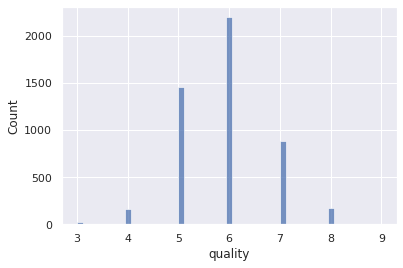

In [ ]:
for i in selective_dataset["quality"].unique():
  numRows = len(selective_dataset[selective_dataset['quality'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=selective_dataset, x="quality")
plt.show()

Clase 3, 4 y 5 = "Bad wines" → clase 0

Clase 6 = "Decent wines" → clase 1

Clase 7, 8 y 9 = "Good wines" → clase 2


In [ ]:
# Mapping quality values
def map_quality(x):
  if x > 6:
    return 2
  elif x == 6:
    return 1
  else:
    return 0

In [ ]:
selective_dataset["quality"] = selective_dataset["quality"].apply(map_quality)

Class 1 :  2198
Class 0 :  1640
Class 2 :  1060


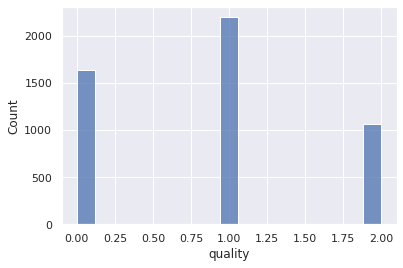

In [ ]:
for i in selective_dataset["quality"].unique():
  numRows = len(selective_dataset[selective_dataset['quality'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=selective_dataset, x="quality")
plt.show()

In [ ]:
values = selective_dataset['quality'].value_counts()
values

1    2198
0    1640
2    1060
Name: quality, dtype: int64

In [ ]:
# Lets extract how many classes there are in class '2'
class_two_count = values[2]

# Lets undersample the data that belongs to class '0'
undersampled_class_cero = selective_dataset[selective_dataset['quality'] == 0].sample(class_two_count, replace=False)
undersampled_class_one = selective_dataset[selective_dataset['quality'] == 1].sample(class_two_count, replace=False)

In [ ]:
# Lets extract all the data with class '1'
class_two_dataset = selective_dataset[selective_dataset['quality'] == 2]

# Lets merge both datasets
undersampled_dataset = pd.concat([class_two_dataset, undersampled_class_cero, undersampled_class_one])

# Lets shuffle the dataset
undersampled_dataset = undersampled_dataset.sample(frac=1).reset_index(drop=True)

# Lets preview
undersampled_dataset

,volatile acidity,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,0.196078,0.127596,0.273782,0.111625,0.690909,0.403226,2
1,0.284314,0.183976,0.294664,0.186813,0.236364,0.193548,0
2,0.196078,0.056380,0.222738,0.042221,0.245455,0.709677,2
3,0.098039,0.094955,0.241299,0.141508,0.636364,0.225806,1
4,0.166667,0.112760,0.354988,0.196453,0.572727,0.241935,0
...,...,...,...,...,...,...,...
3175,0.117647,0.083086,0.222738,0.141315,0.290909,0.403226,2
3176,0.186275,0.112760,0.477958,0.160208,0.427273,0.241935,1
3177,0.215686,0.077151,0.225058,0.039136,0.490909,0.790323,2
3178,0.176471,0.115727,0.148492,0.084635,0.309091,0.548387,1


Class 2 :  1060
Class 0 :  1060
Class 1 :  1060


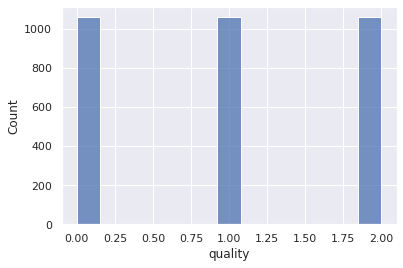

In [ ]:
for i in undersampled_dataset["quality"].unique():
  numRows = len(undersampled_dataset[undersampled_dataset['quality'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=undersampled_dataset, x="quality")
plt.show()

In [ ]:
# Splitting Dataset
train, test = train_test_split(undersampled_dataset, test_size=0.2) # ← Test is 20% and training is 80%

# Sepparating both sets into dependent and independent variables
independent_variables = list(undersampled_dataset.columns)
independent_variables.remove('quality')
dependent_variables = ['quality']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train

,volatile acidity,chlorides,total sulfur dioxide,density,pH,alcohol,quality
676,0.147059,0.115727,0.496520,0.222094,0.400000,0.225806,1
2869,0.068627,0.130564,0.317865,0.077309,0.409091,0.483871,1
2442,0.156863,0.065282,0.292343,0.128976,0.427273,0.403226,0
104,0.215686,0.062315,0.287703,0.119337,0.727273,0.564516,2
1157,0.186275,0.056380,0.368910,0.076923,0.245455,0.661290,2
...,...,...,...,...,...,...,...
100,0.078431,0.083086,0.412993,0.244650,0.245455,0.209677,0
2274,0.166667,0.130564,0.146172,0.133603,0.154545,0.241935,0
2031,0.215686,0.109792,0.401392,0.143436,0.709091,0.387097,0
878,0.107843,0.424332,0.106729,0.107769,0.363636,0.290323,1


In [ ]:
test

,volatile acidity,chlorides,total sulfur dioxide,density,pH,alcohol,quality
1195,0.274510,0.029674,0.243619,0.062657,0.327273,0.758065,2
3177,0.215686,0.077151,0.225058,0.039136,0.490909,0.790323,2
410,0.196078,0.062315,0.234339,0.087334,0.327273,0.725806,2
366,0.225490,0.148368,0.382831,0.177174,0.672727,0.500000,2
2015,0.156863,0.142433,0.331787,0.121265,0.454545,0.241935,1
...,...,...,...,...,...,...,...
3035,0.127451,0.142433,0.299304,0.089647,0.300000,0.467742,0
2799,0.176471,0.142433,0.273782,0.189319,0.345455,0.322581,1
1939,0.068627,0.103858,0.403712,0.198766,0.472727,0.354839,1
902,0.176471,0.192878,0.227378,0.209948,0.218182,0.193548,1


# 3) AI Model

## Callbacks

In [ ]:
# Lets only use EarlyStopping Callback for now
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4,)

## AI Model

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
normal_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(6)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
normal_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
normal_model.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 128 ,
          validation_split=0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/100
16/16 [==============================] - 2s 23ms/step - loss: 1.0983 - accuracy: 0.3833 - val_loss: 1.0822 - val_accuracy: 0.4990
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0686 - accuracy: 0.5479 - val_loss: 1.0503 - val_accuracy: 0.5226
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0295 - accuracy: 0.5312 - val_loss: 1.0067 - val_accuracy: 0.5305
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9874 - accuracy: 0.5400 - val_loss: 0.9658 - val_accuracy: 0.5305
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.9557 - accuracy: 0.5445 - val_loss: 0.9416 - val_accuracy: 0.5442
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9401 - accuracy: 0.5484 - val_loss: 0.9301 - val_accuracy: 0.5481
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.9340 - accuracy: 0.5459 - val_loss: 0.9248 - val_accuracy: 0.5403
Epoch 8/100


In [ ]:
# Lets evaluate our model
normal_model.evaluate(x=test_set, y=test_target, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.9084 - accuracy: 0.5456


[0.9083725810050964, 0.545597493648529]

# 4) Evaluation